In [1]:
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

In [2]:
#df = pd.read_csv('D:/BRAC/Thesis/data/Heart_Disease_PredictionVJ.csv')
df = pd.read_csv('D:/BRAC/Thesis/data/recent/heart_rajniKant_11days.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
target_col = "ca"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  random_state=42)

In [5]:
model_ada = AdaBoostClassifier(n_estimators =650, learning_rate =0.01)
model_ada.fit(X_train, y_train)   #, eval_set=[(X_test, y_test)]

AdaBoostClassifier(learning_rate=0.01, n_estimators=650)

In [6]:
y_pred=model_ada.predict(X_test)
accuracy_score(y_test, y_pred)

0.6047197640117994

In [7]:
#f1_score(y_test, y_pred)

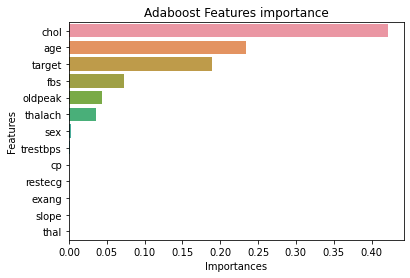

In [8]:
#feature_imp = pd.DataFrame(sorted(zip(model_ada.feature_importances_,X.columns)), columns=['Value','Feature'])
fi=pd.DataFrame({ 'Features':X.columns, 'Importances':model_ada.feature_importances_ })

gp=fi.sort_values(by='Importances', ascending=False)
#print(gp)
sns.barplot(x="Importances", y="Features", data=fi.sort_values(by="Importances", ascending=False))
#plt.tight_layout()
plt.title('Adaboost Features importance')
#plt.bar( gp['Features'],  gp['Importances'])

plt.show()


Confusion matrix:
 [[158  30   1   0   0]
 [ 39  46   0   0   0]
 [ 17  24   0   1   0]
 [  7  11   0   1   0]
 [  4   0   0   0   0]]

Classification report:
               precision    recall  f1-score   support

           0       0.70      0.84      0.76       189
           1       0.41      0.54      0.47        85
           2       0.00      0.00      0.00        42
           3       0.50      0.05      0.10        19
           4       0.00      0.00      0.00         4

    accuracy                           0.60       339
   macro avg       0.32      0.29      0.27       339
weighted avg       0.52      0.60      0.55       339



c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

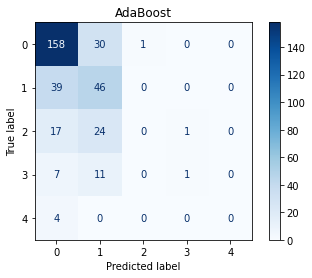

In [9]:
# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print('\nConfusion matrix:\n',confusion_matrix)
print('\nClassification report:\n',metrics.classification_report(y_test, y_pred))
# plot confusion matrix
disp = metrics.plot_confusion_matrix(model_ada, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('AdaBoost')
plt.savefig('Confusion Matrix')

In [27]:
accuracy= accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
error_rate     #classification error

0.3952802359882006

In [32]:
#tune the hyperparameters
from sklearn.model_selection import GridSearchCV
LR= {'learning_rate': [0.15, 0.005, 0.03, 0.05, 0.01],
     'n_estimators':[100,150,200,650, 300, 400, 800]}

tuning = GridSearchCV(estimator = AdaBoostClassifier(),
                   param_grid = LR )
                   # scoring = 'F1')
tuning.fit(X_train, y_train)
tuning.best_params_, tuning.best_score_ 

({'learning_rate': 0.01, 'n_estimators': 650}, 0.5990690785993864)